# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading The Data

In [2]:
df=pd.read_csv("classroom_actions.csv")

In [3]:
#Displaying first five rows from the dataset
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [4]:
#The shape of the dataset
df.shape

(3829, 5)

# Alternative Hypothesis (Ha)

In [5]:
#The average of the total days for the experiment group
expr_toda_avg=df[df['group']=="experiment"]['total_days'].mean()

In [6]:
expr_toda_avg

74.6715935334873

In [7]:
#The average of the total days for the control group
ctr_toda_avg=df[df["group"]=="control"]["total_days"].mean()

In [8]:
ctr_toda_avg

73.36899038461539

In [9]:
#The difference between experiment and control group
altr_hypo=expr_toda_avg - ctr_toda_avg
altr_hypo

1.3026031488719099

- The observed difference for the (Ha) > 0, we can say the null hypothesis(H0) <=0.

- The result from the difference also saying there are an update happened, it's positive and good update.

# Creating The Population

In [10]:
diffs=[]
for i in range(15000):
    sample=df.sample(df.shape[0],replace=True)
    diff=(sample[sample["group"]=="experiment"]["total_days"].mean())-(sample[sample["group"]=="control"]["total_days"].mean())
    diffs.append(diff)

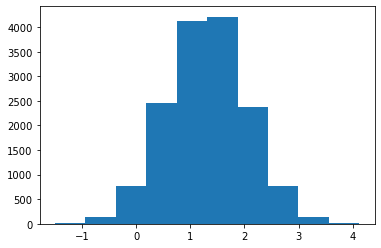

In [11]:
#Plotting the population
plt.hist(diffs);

- The normal distribution for the observed differences.

# Creating H0 Population

In [12]:
#Getting the standard deviation for the diffs 
diffs_std=np.array(diffs).std()
diffs_std

0.7330604854118027

In [13]:
H0_values=np.random.normal(0,diffs_std,len(diffs))
H0_values

array([ 1.18609764,  0.08142689, -0.16757957, ..., -0.19329164,
        1.56232075, -0.71179559])

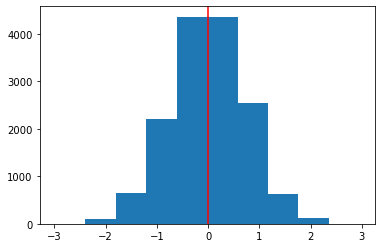

In [14]:
plt.axvline(H0_values.mean(),c='red')
plt.hist(H0_values);

- Null hypothesis distribution with mean equal to zero.

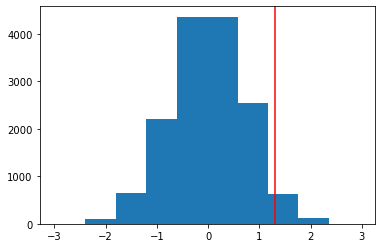

In [15]:
#The observed difference with the H0 distribution
plt.axvline(altr_hypo,c='red')
plt.hist(H0_values);

In [18]:
#Testing if p_value < 5% or p_value> 5%
(H0_values>altr_hypo).mean()

0.0354

- P_value < 0.05 as 0.0354 < 0.05, so the null hypothesis(H0) rejected.